In [ ]:
%load_ext autoreload
%autoreload 2

import sys
import os

current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, ".."))

if project_root not in sys.path:
    sys.path.append(project_root)

In [1]:
from problems import *

In [3]:
# test ie convergence with l=2/3/4/5
N_vals = [1600, 3200, 6400, 12800, 25600]
l_vals = [2, 3, 4, 5]
K_vals = [15, 20, 25, 30]
seeds = np.arange(4)

ie_arr = np.zeros((len(N_vals), len(seeds), len(l_vals)))

for i, N in enumerate(N_vals):
    for j, seed in enumerate(seeds):
        for k in range(len(l_vals)):
            l_grad = l_vals[k]
            K_grad = K_vals[k]

            _, _, ie = poisson_robin_semi_torus(N=N, K_grad=K_grad, l_grad=l_grad, seed=seed)

            ie_l2 =np.sqrt(np.sum(ie ** 2) / N)

            print(f'{N} | {seed} | {l_grad} | {ie_l2:.3e}')

            ie_arr[i, j, k] = ie_l2

np.save('ie', ie_arr)

1600 | 0 | 2 | 7.054e-04
1600 | 0 | 3 | 5.427e-04
1600 | 0 | 4 | 1.188e-03
1600 | 0 | 5 | 1.609e-03
1600 | 1 | 2 | 7.504e-04
1600 | 1 | 3 | 9.765e-04
1600 | 1 | 4 | 1.511e-03
1600 | 1 | 5 | 3.102e-03
1600 | 2 | 2 | 2.464e-03
1600 | 2 | 3 | 2.875e-03
1600 | 2 | 4 | 2.301e-03
1600 | 2 | 5 | 5.334e-03
1600 | 3 | 2 | 7.953e-04
1600 | 3 | 3 | 8.784e-04
1600 | 3 | 4 | 2.000e-03
1600 | 3 | 5 | 1.725e-03
3200 | 0 | 2 | 7.751e-04
3200 | 0 | 3 | 3.496e-04
3200 | 0 | 4 | 2.597e-04
3200 | 0 | 5 | 3.542e-04
3200 | 1 | 2 | 3.349e-04
3200 | 1 | 3 | 2.712e-04
3200 | 1 | 4 | 2.584e-04
3200 | 1 | 5 | 2.129e-04
3200 | 2 | 2 | 3.105e-04
3200 | 2 | 3 | 2.152e-04
3200 | 2 | 4 | 2.696e-04
3200 | 2 | 5 | 2.839e-04
3200 | 3 | 2 | 7.296e-04
3200 | 3 | 3 | 2.348e-04
3200 | 3 | 4 | 3.650e-04
3200 | 3 | 5 | 5.659e-04
6400 | 0 | 2 | 1.444e-04
6400 | 0 | 3 | 6.349e-05
6400 | 0 | 4 | 4.470e-05
6400 | 0 | 5 | 5.503e-05
6400 | 1 | 2 | 1.575e-04
6400 | 1 | 3 | 1.442e-04
6400 | 1 | 4 | 8.270e-05
6400 | 1 | 5 | 7.742e-05


In [10]:
ie_arr[-1, :, -1]

array([1.69676863e-06, 1.80739009e-05, 1.47687302e-06, 1.57478890e-06])

In [ ]:
locals = poisson_robin_semi_torus(N=N, K_grad=30, l_grad=5, seed=2, locals=True)

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_convergence(error_arr, filename=None):
    N_vals = np.array([1600, 3200, 6400, 12800, 25600])
    fig, ax = plt.subplots(figsize=(9, 8))

    err_mean = np.mean(error_arr, axis=1)
    err_std = np.std(error_arr, axis=1)

    for k, l_val in enumerate(l_vals):
        means = err_mean[:, k]
        stds = err_std[:, k]
        
        line, = plt.loglog(N_vals, means, marker='o', label=f'l = {l_val}')
        
        color = line.get_color()
        
        plt.fill_between(
            N_vals, 
            means - stds, 
            means + stds, 
            color=color, 
            alpha=0.2,
            edgecolor=None
        )

    # convergence ref
    def plot_ref_line(anchor, slope, label):
        N0, E0 = anchor
        C = E0 / (N0 ** slope)
        ref_line = C * (N_vals ** slope)

        ax.plot(N_vals, ref_line, 'k--', linewidth=0.5,)

        ax.annotate(
            label, 
            xy=anchor,
            xytext=(50, -10),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=10,
        )

    plot_ref_line((1600, 2e-3), -3.0, r'$O(N^{-3})$')
    plot_ref_line((1600, 3e-2), -1.0, r'$O(N^{-1})$')

    ax.set_xticks(N_vals)
    ax.set_xticklabels(N_vals)
    ax.minorticks_off()

    ax.set_xlabel(r'$N$')
    ax.set_ylabel('FE')

    ax.legend()

    if filename is not None:
        fig.savefig(f'./static/{filename}.pdf', dpi=300, bbox_inches='tight')

    plt.show()

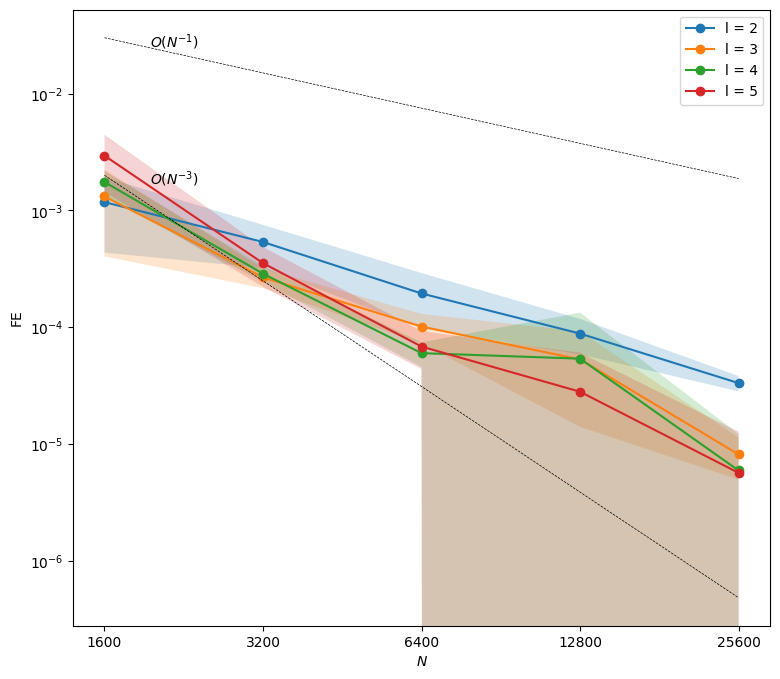

In [7]:
plot_convergence(ie_arr)

In [ ]:
plot_convergence()

In [2]:
# test boundary stencil
N_vals = [1600, 3200, 6400, 12800, 25600]

ie_better_list = []
ie_list = []
for N in N_vals:
    _, _, ie_better = poisson_robin_semi_torus(N, seed=0)
    _, _, ie = poisson_robin_semi_torus(N, seed=0, better_stencil=False)

    ie_better_l2 = np.sqrt(np.sum(ie_better ** 2) / N)
    ie_l2 =np.sqrt(np.sum(ie ** 2) / N)

    print(f"{ie_better_l2:.3e} | {ie_l2:.3e}")

    ie_better_list.append(ie_better_l2)
    ie_list.append(ie_l2)

5.427e-04 | 7.819e-04
3.496e-04 | 2.973e-04
6.349e-05 | 3.727e-05


KeyboardInterrupt: 